[Installation](installing.rst)
[Tutorials](tutorials.rst)
[Examples](examples.rst)
[Gallery](gallery.rst)
[API](api.rst)
[Datasets](datasets.rst)
[FAQ](faq.rst)

## What is Vaex?

Vaex is a python library for lazy **Out-of-Core DataFrames** (similar to Pandas), to visualize and explore big tabular datasets. It can calculate *statistics* such as mean, sum, count, standard deviation etc, on an *N-dimensional grid* up to **a billion** ($10^9$) objects/rows **per second**. Visualization is done using **histograms**, **density plots** and **3d volume rendering**, allowing interactive exploration of big data. Vaex uses memory mapping, a zero memory copy policy, and lazy computations for best performance (no memory wasted).

# Why vaex
 
 * **Performance:** works with huge tabular data, processes $\gt 10^9$ rows/second
 * **Lazy / Virtual columns:** compute on the fly, without wasting ram
 * **Memory efficient** no memory copies when doing filtering/selections/subsets.
 * **Visualization:** directly supported, a one-liner is often enough.
 * **User friendly API:** you will only need to deal with the DataFrame object, and tab completion + docstring will help you out: `ds.mean<tab>`, feels very similar to Pandas.
 * **Lean:** separated into multiple packages
    * `vaex-core`: DataFrame and core algorithms, takes numpy arrays as input columns.
    * `vaex-hdf5`: Provides memory mapped numpy arrays to a DataFrame.
    * `vaex-arrow`: [Arrow](https://arrow.apache.org/) support for cross language data sharing.
    * `vaex-viz`: Visualization based on matplotlib.
    * `vaex-jupyter`: Interactive visualization based on Jupyter widgets / ipywidgets, bqplot, ipyvolume and ipyleaflet.
    * `vaex-astro`: Astronomy related transformations and FITS file support.
    * `vaex-server`: Provides a server to access a DataFrame remotely.
    * `vaex-distributed`: (Deprecated) Now part of vaex-enterprise.
    * `vaex-qt`: Program written using Qt GUI.
    * `vaex`: Meta package that installs all of the above.
    * `vaex-ml`: [Machine learning](ml.ipynb)

 * **Jupyter integration**: vaex-jupyter will give you interactive visualization and selection in the Jupyter notebook and Jupyter lab.

## Installation

Using conda: 

 * `conda install -c conda-forge vaex`

Using pip:

 * `pip install --upgrade vaex`
  
Or read the [detailed instructions](installing.ipynb)

# Getting started

We assume that you have installed vaex, and are running a [Jupyter notebook server](https://jupyter.readthedocs.io/en/latest/running.html). We start by importing vaex and asking it to give us an example dataset.

In [1]:
import vaex
df = vaex.example()  # open the example dataset provided with vaex

Instead, you can [download some larger datasets](datasets.rst), or [read in your csv file](api.rst#vaex.from_csv).

In [2]:
df  # will pretty print the DataFrame

#,x,y,z,vx,vy,vz,E,L,Lz,FeH
0,-0.777470767,2.10626292,1.93743467,53.276722,288.386047,-95.2649078,-121238.171875,831.0799560546875,-336.426513671875,-2.309227609164518
1,3.77427316,2.23387194,3.76209331,252.810791,-69.9498444,-56.3121033,-100819.9140625,1435.1839599609375,-828.7567749023438,-1.788735491591229
2,1.3757627,-6.3283844,2.63250017,96.276474,226.440201,-34.7527161,-100559.9609375,1039.2989501953125,920.802490234375,-0.7618109022478798
3,-7.06737804,1.31737781,-6.10543537,204.968842,-205.679016,-58.9777031,-70174.8515625,2441.724853515625,1183.5899658203125,-1.5208778422936413
4,0.243441463,-0.822781682,-0.206593871,-311.742371,-238.41217,186.824127,-144138.75,374.8164367675781,-314.5353088378906,-2.655341358427361
...,...,...,...,...,...,...,...,...,...,...
"329,995",3.76883793,4.66251659,-4.42904139,107.432999,-2.13771296,17.5130272,-119687.3203125,746.8833618164062,-508.96484375,-1.6499842518381402
"329,996",9.17409325,-8.87091351,-8.61707687,32.0,108.089264,179.060638,-68933.8046875,2395.633056640625,1275.490234375,-1.4336036247720836
"329,997",-1.14041007,-8.4957695,2.25749826,8.46711349,-38.2765236,-127.541473,-112580.359375,1182.436279296875,115.58557891845703,-1.9306227597361942
"329,998",-14.2985935,-5.51750422,-8.65472317,110.221558,-31.3925591,86.2726822,-74862.90625,1324.5926513671875,1057.017333984375,-1.225019818838568


Using [square brackets[]](api.rst#vaex.dataframe.DataFrame.__getitem__), we can easily filter or get different views on the DataFrame.

In [3]:
df_negative = df[df.x < 0]  # easily filter your DataFrame, without making a copy
df_negative[:5][['x', 'y']]  # take the first five rows, and only the 'x' and 'y' column (no memory copy!)

#,x,y
0,-0.777471,2.10626
1,-7.06738,1.31738
2,-5.17174,7.82915
3,-15.9539,5.77126
4,-12.3995,13.9182


When dealing with huge datasets, say a billion rows ($10^9$), computations with the data can waste memory, up to 8 GB for a new column. Instead, vaex uses lazy computation, storing only a representation of the computation, and computations are done on the fly when needed. You can just use many of the numpy functions, as if it was a normal array.

In [4]:
import numpy as np
# creates an expression (nothing is computed)
some_expression = df.x + df.z
some_expression  # for convenience, we print out some values

<vaex.expression.Expression(expressions='(x + z)')> instance at 0x118f71550 values=[1.159963903, 7.53636647, 4.00826287, -13.17281341, 0.036847591999999985 ... (total 330000 values) ... -0.66020346, 0.5570163800000003, 1.1170881900000003, -22.95331667, 5.8866963199999995] 

These expressions can be added to a DataFrame, creating what we call a *virtual column*. These virtual columns are similar to normal columns, except they do not waste memory.

In [5]:
df['r'] = some_expression  # add a (virtual) column that will be computed on the fly
df.mean(df.x), df.mean(df.r)  # calculate statistics on normal and virtual columns

(-0.06713149126400597, -0.0501732470530304)

One of the core features of vaex is its ability to calculate statistics on a regular (N-dimensional) grid. The dimensions of the grid are specified by the binby argument (analogous to SQL's grouby), and the shape and limits.

In [6]:
df.mean(df.r, binby=df.x, shape=32, limits=[-10, 10]) # create statistics on a regular grid (1d)

array([-9.67777315, -8.99466731, -8.17042477, -7.57122871, -6.98273954,
       -6.28362848, -5.70005784, -5.14022306, -4.52820368, -3.96953423,
       -3.3362477 , -2.7801045 , -2.20162243, -1.57910621, -0.92856689,
       -0.35964342,  0.30367721,  0.85684123,  1.53564551,  2.1274488 ,
        2.69235585,  3.37746363,  4.04648274,  4.59580105,  5.20540601,
        5.73475069,  6.28384101,  6.67880226,  7.46059303,  8.13480148,
        8.90738265,  9.6117928 ])

In [7]:
df.mean(df.r, binby=[df.x, df.y], shape=32, limits=[-10, 10]) # or 2d
df.count(df.r, binby=[df.x, df.y], shape=32, limits=[-10, 10]) # or 2d counts/histogram

array([[22., 33., 37., ..., 58., 38., 45.],
       [37., 36., 47., ..., 52., 36., 53.],
       [34., 42., 47., ..., 59., 44., 56.],
       ...,
       [73., 73., 84., ..., 41., 40., 37.],
       [53., 58., 63., ..., 34., 35., 28.],
       [51., 32., 46., ..., 47., 33., 36.]])

These one and two dimensional grids can be visualized using any plotting library, such as matplotlib, but the setup can be tedious. For convenience we can use [plot1d](api.rst#vaex.dataframe.DataFrame.plot1d), [plot](api.rst#vaex.dataframe.DataFrame.plot), or see the [list of plotting commands](api.rst#visualization)

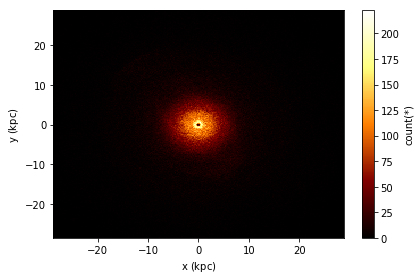

In [8]:
df.plot(df.x, df.y, show=True);  # make a plot quickly

## Continue
[Continue the tutorial here](tutorial.ipynb) or check the [examples](examples.rst)